<a href="https://colab.research.google.com/github/arncelik/TAMU-Datathon-Challenges/blob/master/3_Darren_Cline_Logistic_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Logistic Regression, Classification, and Measuring Performance

Now that we know what it means to fit a model, we are going to dive into the second type of data prediction which is called **classification**.

## Learning Objectives:
* What is classification?
* What is logistic regression?
* A visual introduction to the optimization problem
* Fit a logistic regression model yourself!
* Fit a logistic regression model using the Scikit Learn library.
* Fake News!! What is accuracy, true/false positives/negatives, precision, recall?



### What is Classification?

![alt text](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2014/09/Classification-and-Regression-dataaspirant.png?resize=690%2C518)

**Classification (as opposed to regression) is used when the 'target' is categorical or qualitative e.g. pass/fail**


## What is Logistic Regression?

Logistic Regression is a classification algorithm that is used to predict the probability of a categorical outcome variable

### The target
In logistic regression, the outcome/supervisor (typically notated as Y) must have two levels (and hence is binary) and coded as

* 1 for an event (also referred to as a success)
* 0 for no event (also referred to as a failure) 

The levels assigned to 1 and 0 (and hence event/no event) are arbitrary.

However, there are strong conventions to assign the 'event' level to interesting/notable outcome

* Detecting a disease
* Classifying a plane as needing to be taken out of service
* Labeling an email as spam
* Determining if an applicant is credit-worthy
* Direct marketing for a subscription service
* Predicting customer churn


### The input

With logistic regression, we will seek to make these classifications by using a set of other measurements known as inputs/features (typically notated as X).  

### The underlying model

With the logistic regression model, will will seek to estimate probabilities: P(Y=1) as a function of X (we can write this concisely via p(X) = P(Y = 1 | X) )

#### Intuition
Suppose we classifying emails as spam/not spam.  Classically, the number of consecutive capital letters is a good predictor of spam.  

Let X be the maximum number of consecutive capital letters divided by the total number of letters in the email

Intuitively:

* the probability that the email is 'spam' given that X is small P(Y = 1 | X is small) 

is going to be much smaller than

* the probability that the email is 'spam' given that X is large P(Y = 1 | X is large)


### Odds
If we have a probability of an outcome P, then the odds of that outcome are $P/(1-P)$

**Example** The outcome is winning the lottery:  

![lottery](https://advancelocal-adapter-image-uploads.s3.amazonaws.com/image.nj.com/home/njo-media/width2048/img/lottery_impact/photo/powerball-mega-millionsjpg-291a603a3d213c87.jpg)



If the probability is 0.000001, then the odds of winning are:

In [0]:
prob = 0.000001
odds = prob/(1-prob)
print(odds)


1.000001000001e-06


(Note that typically in gambling they report the reciprocal $(1-P)/P$ as the 'event' of interest has such a tiny probability)

### Putting it all together

Logistic regression has some strong similarities to multiple linear regression. At its core, we are modeling the relationship between the supervisor and features via a linear model: $b + wX$ (here, interpret $wX = \sum_j w_j X_j$)

The main difference is that it doesn't make any sense to write


$$p(X) = b + wX $$ 

**(why doesn't it make sense? See the below figure)**

So, the model gets specified indirectly via the (log) odds


$$log\left(\frac{p(X)}{1-p(X)} \right) = b + wX$$

Though this expression looks complicated, there are nice/stable numerical routines for solving for $w$

We are often interested in estimating the relationship between $X$ and $Y$.  This is captured by the parameter $w$.  However, again, the relationship isn't as straight-forward as it is for multiple linear regression

* A one unit change in $X$ is associated with a $w$ unit change in the **log odds of $Y = 1$** (holding all other features constant)
* A one unit change in $X$ is associated with a **multiplicative** $e^w$ unit change in the **odds of $Y = 1$** (holding all other features constant)
* We can fully invert to get back to the probability itself

$$p(X) = \frac{e^{b + wX}}{1 + e^{b + wX}}$$

(But, there isn't a 'slope' based interpretation)

Let's take a look at what the estimated probabilities would be if we mistakenly applied linear regression (left) and if we applied logistic regression (right)

![alt text](https://miro.medium.com/max/700/0*j4b6G61h6FGvaS16.jpg)

This is the 'logistic' or 'sigmoid' function



# Classification

To turn logistic regression into a classifier, we need to 

* Estimate the weights, $w$, and intercept, $b$, with $\hat{w}$ and $\hat{b}$, respectively.
* Use the estimated weights to get probability estimates, 

$$\hat{p}(X) = \frac{e^{\hat{b} + \hat{w}X}}{1 + e^{\hat{b} + \hat{w}X}}$$

* Convert the probability estimates into classifications in terms of the supervisor $Y$: $\hat{Y} = 1$ if $\hat{p}(X) > \tau$, where $\tau$ is a threshold between $0$ and $1$

## Example

In this example, $X$ has two entries $x_1 = $ balance and $x_2 = $ income.  The colors are whether the person ultimately defaulted on the line of credit:

$$ Y = 
\begin{cases} 
1 \textrm{ (blue) } & \textrm{ if 'default'} \\ 
0 \textrm{ (green) } & \textrm{ if 'no default'} 
\end{cases}
$$

We estimate the logistic regression model and draw a line known as the **decision boundary** that corresponds to the set of all $X$ such that $\hat{p}(X) = \tau$.  In this case, we choose $\tau = 0.5$ as this is a common choice, but this threshold is a parameter that needs to be set.

![](https://drive.google.com/uc?id=1MXSjOTGOi_o0aE4hfCgqL-fodH0LP8r4)

We can see this threshold in action by plotting $\hat{p}(X)$.  You can image different classifications we would get by varying $\tau$ to lower/higher values.
![](https://drive.google.com/uc?id=109Ss0A0rSsHN8pmt_h_vWg4IESWGZTd0)


### The good, the bad, the ugly

![alt text](https://m.media-amazon.com/images/M/MV5BOTU5OTE0ODQ5NF5BMl5BanBnXkFtZTgwMjI0MDg5MTE@._V1_SY1000_CR0,0,1297,1000_AL_.jpg)

#### The good

* Logistic regression is very interpretable.  The weight $w$ gives us insight into the relationship between $X$ and $Y$. In our example, $\hat{w}_1 = 7.83$ for $x_1$ and  $\hat{w}_2 = -0.404$ for $x_2$.  So, for instance, we estimate a a postive relationship between balance and probability of default, holding income constant.
* It can be solved for efficiently.  Combine the model
$p(X) = \frac{e^{b + wX}}{1 + e^{b + wX}}$
and the data to form a **likelihood**, which we can maximize over any possible $b$ and $w$ to produce $\hat{b}$ and $\hat{w}$

![](https://drive.google.com/uc?id=12AN8Vl_Af0pSdhA9LPw_t7XHB-AWVPkr)
* There exist many, free, easily available  numerical implementations
* The estimated probabilities tend to be 'well-calibrated'

#### The bad

* More complex/modern machine learning classifiers tend to have better performance

![](https://drive.google.com/uc?id=1aib4AdB63aEX0MBf2mzSzXEbahjFRyKC)

* You must manually select relevant feature transformations
* Logistic regression isn't natural for classification problems where the supervisor has more than 2 levels (example: blood type)

#### The ugly

* Algorithms for solving for $w$ are all iterative (e.g. Newton-Raphson, Iteratively-reweighted least squares, or LBFGS).  Sometimes, the iterations fail, particularly when the training data are 'linearly separable'






![](https://drive.google.com/uc?id=14dlSgZZpwMLpTr5OGwi07cQU9xU3mWNR)
![](https://drive.google.com/uc?id=15ExQrFPxxpxt9Vbs8lSvbkVi7IzXOnRQ)




# Estimating the Logistic Regression Model

As a reminder, logistic regression models the probabilities as

$$p(X) = \frac{e^{b + wx}}{1 + e^{b + wx}}$$

We can estimate this model using *Python*

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd             # efficient data structure
import seaborn as sns           # plotting heat map

In [0]:
def logistic_predict_prob(w, b, x):
  return (np.e**(b+w*x)) / (1 + np.e**(b+w*x))

def logistic_predict_binary(w, b, x):
  return logistic_predict_prob(w, b, x) >= 0.5

def accuracy(y_true, y_pred):
  return (y_true == y_pred).sum() / len(y_pred)


In [0]:
def dummy_data():
  x1 = np.sort(np.random.uniform(0, 7, 50))
  x2 = np.sort(np.random.uniform(4, 10, 50))
  x  = np.concatenate([x1, x2])
  y  = np.concatenate([np.zeros(50), np.ones(50)])
  return x, y
# Set constants for plotting
w_min, w_max, w_step = 0, 10, .5
b_min, b_max, b_step = -20, 5, .5
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)
x, y = dummy_data()
x_range = np.linspace(min(x), max(x), 100)

In [0]:
def last0_idx(a):
  last0x = np.where(~a)[0]
  return max(last0x) if len(last0x) > 0 else None


def plot_model(w, b):
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Past Users")
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    plt.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy(y, predictions)))
    plt.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    plt.xlabel("Months the user has used the service")
    plt.ylabel("Probability of user staying on the service")
    if 0 in predictions:
      last0x = x_range[last0_idx(y_hat > 0.5)]
      plt.annotate(
        "Predict that a user\n"
        "with more than {:.1f} months\n"
        "using the service will stay."
        .format(last0x),
        (last0x+.3, 0.5)
      )
    plt.legend(loc='upper left')
    plt.title('Fit Model To Data')

In [0]:
# Some libraries we need for interactive plotting
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits import mplot3d

### Hand fit a model

Let's look at an example involving customer churn.  We will be looking at the relationship between X = months the user has been on the service and Y = whether the user has left the service (Y = 1 is the user is still on the service)

In [0]:
# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1.5, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data")
plt.show()

interactive(children=(FloatSlider(value=1.5, description='w', max=10.0, step=0.5), FloatSlider(value=-8.0, des…

Adjust the parameters: w and b to fit the model to the data


### Have the computer fit the model

Computer Fit Model: w=0.9, b=-4.5


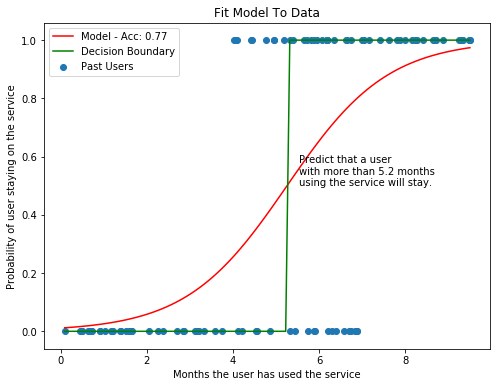

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs").fit(x.reshape(-1, 1), y)
w, b = model.coef_[0][0], model.intercept_[0]

plot_model(w, b)
print("Computer Fit Model: w={:.1f}, b={:.1f}".format(w, b))

# Judging Performance of a Logistic Regression Model

There are a huge variety of different ways to judge performance for logistic regression 

(these all work equally well for other classifiers as well, as long as the supervisor takes only two levels)

The fundamental object that is used for all of these performance metric is the **confusion matrix**

## Confusion Matrix

A confusion matrix is a way to visualize our model's success. In short, you want the highest numbers along the diagonal (correct guesses). We'd like 0's everywhere else!


![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)




Let's define these terms via an example involving social media

![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)

![alt text](https://d1i4t8bqe7zgj6.cloudfront.net/11-18-2016/t_1479489048302_name_20161119_zuckerberg1.jpg)

Facebook has been in the news a lot for their policies on fake news... 
Maybe you believe that facebook should crack down more on fake news so it doesn't spread across the globe. Maybe you feel that they are cracking down too hard and taking down people's posts that shouldn't be taken down. 

Remembering that we define the 'event' to be the interesting outcome, we would set $Y = 1$ to be an article is deemed 'fake'.  Using another term, we can say that this is a 'positive'.  Hence, a 'negative' would be that the article is plain ol' real news.

Sometimes, we will be correct in our labels, sometimes incorrect.  The confusion matrix allows us to categorize these mistakes:

* **True positive**: We classify as 'fake news' when the article is indeed 'fake news'
* **False positive**: We classify as 'fake news' when the article is 'real news'
* **True negative**: We classify as 'real news' when the article is indeed 'real news'
* **False negative**: We classify as 'real news' when the article is 'fake news'


If we just want to make the smallest number of mistakes, we would want a classifier with high accuracy

* **accuracy**: $$\frac{ \textrm{True positive + True negative}}{\textrm{(total number of predictions)}$$



However, as different mistakes have different implications, we can make more refined statements:
(Read More: [Why Accuracy Is Not Enough](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/))


* **precision**: $$\frac{\textrm{True positive}}{\textrm{True positive + False positive}}$$

If we had a classifier with good precision, we would only take down news articles that we were ABSOLUTELY sure were fake news. By doing this, we may possibly miss some fake news stories.

* **recall**: $$\frac{\textrm{True positive}}{\textrm{True positive + False negative}}$$

If we had a classifier with good recall, we would take down ANY POSSIBLE fake news stories. However, we may take down some real news in the process.


Each of these would have profound business implications




![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)




In [0]:
def true_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 1)

def true_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 0)

def false_pos(y_truth, y_pred):
  return np.logical_and(y_pred == 1, y_truth == 0)

def false_neg(y_truth, y_pred):
  return np.logical_and(y_pred == 0, y_truth == 1)

In [0]:
def plot_model(w, b):
    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
    y_hat = logistic_predict_binary(w, b, x)
    tp, fp = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label=f"False Neg: {fn}", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label=f"False Pos: {fp}", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label=f"True Neg: {tn}", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label=f"True Pos: {tp}", c='blue')
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier')

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, step=0.5), FloatSlider(value=-8.0, des…

Adjust the parameters: w and b to fit the model to the data!


![alt text](https://miro.medium.com/max/1024/1*-BkpqhN-5fPicMifDQ0SwA.png)



In [0]:
def plot_model(w, b):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    y_hat = logistic_predict_binary(w, b, x)
    tp, fp = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label=f"False Neg: {fn}", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label=f"False Pos: {fp}", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label=f"True Neg: {tn}", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label=f"True Pos: {tp}", c='blue')
    # Plot Confusion Matrix
    matrix = [
          [tp, fp],
          [fn, tn]
    ]
    df = pd.DataFrame(
        matrix,
        index = ["Predict \nFake News", "Predict \nReal News"],
        columns = ["Truth: Fake News", "Truth: Real News"]
    )
    ax2.set_title("Confusion Matrix")
    sns.heatmap(df, annot=True, cmap="Blues", ax=ax2, cbar=False)
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier', fontsize=20)

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, step=0.5), FloatSlider(value=-8.0, des…

Adjust the parameters: w and b to fit the model to the data!


In [0]:
def recall(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_neg(y_truth, y_pred).sum())

def precision(y_truth, y_pred):
  return true_pos(y_truth, y_pred).sum() / (true_pos(y_truth, y_pred).sum() + false_pos(y_truth, y_pred).sum())

def f1(y_truth, y_pred):
  prec = precision(y_truth, y_pred)
  recl = recall(y_truth, y_pred)
  return 2 * ((prec*recl)/(prec+recl))

In [0]:
def plot_model(w, b):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    y_hat = logistic_predict_binary(w, b, x)
    tp, fp = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label="False Neg", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label="False Pos", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label="True Neg", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label="True Pos", c='blue')
    # Percision and Recall
    ax1.annotate("Recall: {:.2f}".format(recall(y, y_hat)), (0, .4), fontsize=12, horizontalalignment='left')
    ax1.annotate("Precision: {:.2f}".format(precision(y, y_hat)), (0, .3), fontsize=12, horizontalalignment='left')
    ax1.annotate("F1: {:.2f}".format(f1(y, y_hat)), (0, .2), fontsize=12, horizontalalignment='left')
    # Plot Model
    y_hat = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel("Fake News Score")
    ax1.set_ylabel("Probability of Story Being Fake News")
    ax1.legend(loc='upper left')
    ax1.set_title('Fake News Classifier')
        # Plot Confusion Matrix
    matrix = [
          [tp, fp],
          [fn, tn]
    ]
    df = pd.DataFrame(
        matrix,
        index = ["Predict \nFake News", "Predict \nReal News"],
        columns = ["Truth: Fake News", "Truth: Real News"]
    )
    ax2.set_title("Confusion Matrix")
    sns.heatmap(df, annot=True, cmap="Blues", ax=ax2, cbar=False)

# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
interact(
  plot_model,
  w = widgets.FloatSlider(value=1, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-8, min=b_min, max=b_max, step=b_step)
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, step=0.5), FloatSlider(value=-8.0, des…

Adjust the parameters: w and b to fit the model to the data!


### Reminder:

* **precision**: $$\frac{\textrm{True positive}}{\textrm{True positive + False positive}}$$

* **recall**: $$\frac{\textrm{True positive}}{\textrm{True positive + False negative}}$$

## Putting it all together

Let's look at the interpreting the 'fake news score' feature

Computer Fit Model: w=1.3, b=-6.7


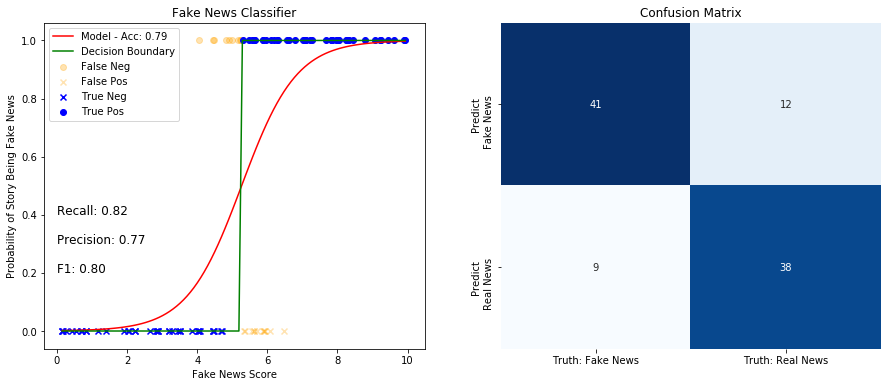

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs").fit(x.reshape(-1, 1), y)
w, b = model.coef_[0][0], model.intercept_[0]

plot_model(w, b)
print("Computer Fit Model: w={:.1f}, b={:.1f}".format(w, b))


## Feature Interpretation

Let's look at the interpreting the 'fake news score' feature. We estimate $\hat{w} = 0.9$, which can be interpretted as

'We estimate that a one unit increase in 'Fake news Score' is **associated with** a multiplicative change in the odds of being fake news of exp(0.9) = 2.46'

So, we estimate that if we had two articles:
* **Article 1**: 'fake news score' = 4 
* **Article 2**: 'fake news score' = 5 

Then, we estimate that the odds of Article 2 being fake news is 2.46 times the odds that Article 1 is fake news.

We can also estimate probabilities (say for Article 2) using:

$$
\hat{p}(X) 
= 
\frac{e^{\hat{b} + \hat{w}X}}{1 + e^{\hat{b} + \hat{w}X}} 
= 
\frac{e^{-4.9 + 0.9*5}}{1 + e^{-4.9 + 0.9*5}}
=
\frac{0.67032}{1 + 0.67032}
=
0.40
$$


## Challenges

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. 

One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

Let's examine this idea further using logistic regression and a list of 887 of the Titanic passengers (titanic.csv). Each row represents one person. The columns describe different attributes about the person including 

* whether they survived (S = 1 if survived) 
* their age (A)
* their passenger-class (C = 1, 2, 3)
* their gender (G = male or female) 
* the fare they paid (F).



In [0]:
titanic = pd.read_csv("titanic.csv")
print(titanic.head())
titanic = titanic.drop(['ParentsOrChildren','SiblingOrSpouse'], axis = 1)
print(titanic.head())


   Survived  Pclass  ... ParentsOrChildren     Fare
0         0       3  ...                 0   7.2500
1         1       1  ...                 0  71.2833
2         1       3  ...                 0   7.9250
3         1       1  ...                 0  53.1000
4         0       3  ...                 0   8.0500

[5 rows x 8 columns]
   Survived  Pclass  ...   Age     Fare
0         0       3  ...  22.0   7.2500
1         1       1  ...  38.0  71.2833
2         1       3  ...  26.0   7.9250
3         1       1  ...  35.0  53.1000
4         0       3  ...  35.0   8.0500

[5 rows x 6 columns]


AttributeError: ignored

Let's adapt the plot_model function to the titanic data

In [0]:
def plot_model(w, b, y, X):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    x       = X.values
    x_range = np.linspace(min(x), max(x), 100)
    y_hat   = logistic_predict_binary(w, b, x)
    tp, fp  = true_pos(y, y_hat).sum(), false_pos(y, y_hat).sum()
    fn, tn  = false_neg(y, y_hat).sum(), true_neg(y, y_hat).sum()
    ax1.scatter(x[false_neg(y, y_hat)], y[false_neg(y, y_hat)], label="False Neg", c='orange', alpha=.3)
    ax1.scatter(x[false_pos(y, y_hat)], y[false_pos(y, y_hat)], label="False Pos", c='orange', alpha=.3, marker="x")
    ax1.scatter(x[true_neg(y, y_hat)], y[true_neg(y, y_hat)], label="True Neg", c='blue', marker="x")
    ax1.scatter(x[true_pos(y, y_hat)], y[true_pos(y, y_hat)], label="True Pos", c='blue')
    # Percision and Recall
    ax1.annotate("Recall: {:.2f}".format(recall(y, y_hat)), (0, .4), fontsize=12, horizontalalignment='left')
    ax1.annotate("Precision: {:.2f}".format(precision(y, y_hat)), (0, .3), fontsize=12, horizontalalignment='left')
    ax1.annotate("F1: {:.2f}".format(f1(y, y_hat)), (0, .2), fontsize=12, horizontalalignment='left')
    # Plot Model
    y_hat       = logistic_predict_prob(w, b, x_range)
    predictions = logistic_predict_binary(w, b, x)
    accuracy    = (predictions == y).sum() / len(predictions)
    ax1.plot(x_range, y_hat, color="r", label='Model - Acc: {}'.format(accuracy))
    ax1.plot(x_range, logistic_predict_binary(w, b, x_range), color="g", label='Decision Boundary')
    ax1.set_xlabel(X.name)
    ax1.set_ylabel("Probability of Survival")
    ax1.legend(loc='upper left')
    ax1.set_title('Survival Classifier')
        # Plot Confusion Matrix
    matrix = [
          [tp, fp],
          [fn, tn]
    ]
    df = pd.DataFrame(
        matrix,
        index = ["Predict \nSurvive", "Predict \nDie"],
        columns = ["Truth: Survive", "Truth: Die"]
    )
    ax2.set_title("Confusion Matrix")
    sns.heatmap(df, annot=True, cmap="Blues", ax=ax2, cbar=False)


# Challenges:

1. Write down the logistic regression model for the log odds of surviving as a function of the measurements.  To get you started, it will look like

$$log\left(\frac{p(X)}{1-p(X)} \right) = b + w_1 A + ...$$

2. In order to fit this model, we need to convert the qualitative inputs into 'dummy variables', which are indicators of particular values each input could take on.  For instance, 'gender' could take on values 'male' or 'female'.  In order the linear model to make sense, we must turn this into a 1 dummy variable.
Observe the following example and then apply this idea to create the input matrix X


In [0]:
import pandas as pd

rawData = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'gender': ['male', 'female', 'male', 'female', 'female']}
df = pd.DataFrame(rawData, columns = ['first_name', 'last_name', 'gender'])
print(df)

dfGender = pd.get_dummies(df['gender'], drop_first = True)
dfNew    = pd.concat([df.drop('gender', axis = 1), dfGender], axis = 1)

print(dfNew)

  first_name last_name  gender
0      Jason    Miller    male
1      Molly  Jacobson  female
2       Tina       Ali    male
3       Jake    Milner  female
4        Amy     Cooze  female
  first_name last_name  male
0      Jason    Miller     1
1      Molly  Jacobson     0
2       Tina       Ali     1
3       Jake    Milner     0
4        Amy     Cooze     0


In [0]:
pClassDummy            = pd.get_dummies(titanic['Pclass'], drop_first = True)
genderDummy            = pd.get_dummies(titanic['Gender'], drop_first = True)

X = pd.concat([titanic.drop(['Survived','Name','Pclass','Gender'], axis = 1),
              pClassDummy, genderDummy], 
              axis = 1)

print(X.head())
inputNames = list(X.columns)

Y = titanic['Survived']
print(Y.head())

    Age     Fare  2  3  male
0  22.0   7.2500  0  1     1
1  38.0  71.2833  0  0     0
2  26.0   7.9250  0  1     0
3  35.0  53.1000  0  0     0
4  35.0   8.0500  0  1     1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


3. Now, we are in a position to fit the logistic regression model.  First, let's look at the univariate logistic regression model of 'Survived' on 'Age' (do you have a guess as whether Age will be positively associated with survival status?).  



In [0]:
# Run this block to vizualize how to fit a model
# You may have to run this cell a few times to get the plot to show
w_min, w_max, w_step = -1, 1, .05
b_min, b_max, b_step = -5, 5, .5
w_range = np.linspace(w_min, w_max, 100)
b_range = np.linspace(b_min, b_max, 100)

interact(
  plot_model,
  w = widgets.FloatSlider(value=.25, min=w_min, max=w_max, step=w_step),
  b = widgets.FloatSlider(value=-1, min=b_min, max=b_max, step=b_step),
  y = fixed(Y),
  X = fixed(X['Fare'])
)
print("Adjust the parameters: w and b to fit the model to the data!")
plt.show()

interactive(children=(FloatSlider(value=0.25, description='w', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

Adjust the parameters: w and b to fit the model to the data!


Let's estimate the parameters with logistic regression. Do you 'by eye' parameters match what Python estimates?

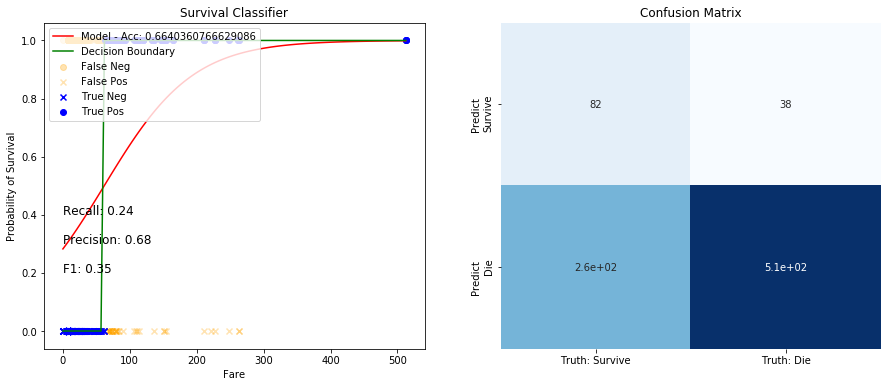

Computer Fit Model: w=0.0, b=-0.9


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs").fit(X['Fare'].values.reshape(-1,1), Y)
w, b  = model.coef_[0][0], model.intercept_[0]

plot_model(w, b, Y, X['Fare'])
plt.show()
print("Computer Fit Model: w={:.1f}, b={:.1f}".format(w, b))

  4. (continued) What is the specificity of this estimated model? What is the precision? What is the sensitivity?

In [0]:
specificity = 510./(38. + 510.)
sensitivity = 82./(82. + 260.)
precision   = 82./(38. + 82.)

print("Specificity = {:.3f}".format(specificity))
print("Sensitivity = {:.3f}".format(sensitivity))
print("Precision = {:.3f}".format(precision))


Specificity = 0.931
Sensitivity = 0.240
Precision = 0.683


  5. Let's fit the full logistic regression model using all of the inputs.  Is the estimated association between the probability of survival positive or negative for Age? What about for Male?  What do we infer the odds of survival are for a Male versus odds of survival of a Female?



In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs", max_iter = 500).fit(X.values, Y)
w, b  = model.coef_[0], model.intercept_[0]
wDF   = pd.DataFrame(w.reshape(1,len(inputNames)), columns=inputNames)

print(wDF)

        Age      Fare         2         3      male
0 -0.031092  0.001432 -0.948697 -2.155482 -2.463237


In [0]:
print(wDF['Age'])
print(wDF['male'])

0   -0.031092
Name: Age, dtype: float64
0   -2.463237
Name: male, dtype: float64


We estimate a negative associate for both: holding the other inputs constant, an increase in Age is associated with a decrease in probability of survival. Also, being male is associated with a lower probability than being female.

In [0]:
print(np.e**(wDF['male']))


0    0.085159
Name: male, dtype: float64


To be more precise, holding all other inputs constant, we estimated that the odds of survival for a male are 0.085 times the odds of survival of a female.

In [0]:
# These are internal libraries used to manage your submissions to the challenges
# You won't have to install / import these in your normal usage
!pip install pycosmos --upgrade --quiet
from pycosmos import CosmosProject
tamu_datathon = CosmosProject('tamu_datathon')

email = "phulsechinmay@gmail.com" # Enter your email here

print(tamu_datathon.judge_attempt('lesson_3_completion', email, ["Done"]))